In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
dataset_train = pd.read_csv('HSI.csv')
training_set = dataset_train.iloc[0:250,1:2].values

In [8]:
training_set

array([[25625.57031],
       [25736.88086],
       [25848.73047],
       [26169.50977],
       [25831.43945],
       [25901.4707 ],
       [25844.71094],
       [25977.98047],
       [26075.15039],
       [26162.71094],
       [26300.21094],
       [26463.61914],
       [26532.88086],
       [26820.73047],
       [26838.42969],
       [26942.96094],
       [27212.89063],
       [27154.50977],
       [27283.98047],
       [26790.64063],
       [26831.98047],
       [26743.35938],
       [26773.13086],
       [26512.85938],
       [25675.16016],
       [25546.32031],
       [25627.83008],
       [26011.64063],
       [25606.33008],
       [25767.08008],
       [25715.98047],
       [25322.     ],
       [26057.88086],
       [26272.91016],
       [26160.53906],
       [26256.53906],
       [25994.80078],
       [25484.96094],
       [24945.74023],
       [25711.09961],
       [25536.61914],
       [25869.48047],
       [26278.91992],
       [25999.44922],
       [25977.7207 ],
       [25

In [9]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,10-10-19,25625.57031,25809.58008,25521.94922,25707.92969,25707.92969,1.434232e+09
1,09-10-19,25736.88086,25866.83984,25656.66016,25682.81055,25682.81055,1.588334e+09
2,08-10-19,25848.73047,26180.02930,25761.50000,25893.40039,25893.40039,1.779110e+09
3,04-10-19,26169.50977,26169.50977,25612.49023,25821.02930,25821.02930,1.137244e+09
4,03-10-19,25831.43945,26192.86914,25809.47070,26110.31055,26110.31055,1.142351e+09


In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [16]:
X_train = []
y_train = []
for i in range(7,250):
    X_train.append(training_set_scaled[i-7:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [20]:
X_train[2]

array([[0.20264957],
       [0.26196681],
       [0.19945219],
       [0.21240209],
       [0.2019063 ],
       [0.22654997],
       [0.24451825]])

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [43]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train,y_train,epochs = 100,batch_size = 3)

Epoch 1/100
243/243 [==============================] - 9s 38ms/step - loss: 0.0638
Epoch 2/100
243/243 [==============================] - 7s 30ms/step - loss: 0.0216
Epoch 3/100
243/243 [==============================] - 3s 13ms/step - loss: 0.0182
Epoch 4/100
243/243 [==============================] - 3s 14ms/step - loss: 0.0215
Epoch 5/100
243/243 [==============================] - 3s 14ms/step - loss: 0.0164
Epoch 6/100
243/243 [==============================] - 3s 14ms/step - loss: 0.0169
Epoch 7/100
243/243 [==============================] - 3s 14ms/step - loss: 0.0186
Epoch 8/100
243/243 [==============================] - 3s 14ms/step - loss: 0.0158
Epoch 9/100
243/243 [==============================] - 3s 14ms/step - loss: 0.0180
Epoch 10/100
243/243 [==============================] - 3s 14ms/step - loss: 0.0177: 0s - los
Epoch 11/100
243/243 [==============================] - 4s 15ms/step - loss: 0.0154
Epoch 12/100
243/243 [==============================] - 4s 15ms/step - loss

Epoch 98/100
243/243 [==============================] - 7s 30ms/step - loss: 0.0053
Epoch 99/100
243/243 [==============================] - 5s 20ms/step - loss: 0.0051
Epoch 100/100
243/243 [==============================] - 5s 19ms/step - loss: 0.0054


In [44]:
dataset_test = pd.read_csv('HSI_test(edit).csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [45]:
real_stock_price

array([[26840.19922],
       [27716.16016],
       [27879.06055],
       [27912.50977],
       [27606.81055],
       [27783.84961],
       [27712.34961],
       [27605.7207 ],
       [27170.01953],
       [26846.33008],
       [27029.91016],
       [27229.78906],
       [26798.39063],
       [26462.82031],
       [26611.92969],
       [26922.26953],
       [26895.86914],
       [27069.21094],
       [27789.01953],
       [27619.17969],
       [27809.44922],
       [27798.21094],
       [28533.92969],
       [28362.83984],
       [28530.89063]])

In [46]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 7:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(7,32): #7(Timestamp) + 25 (jumlah data test)
    X_test.append(inputs[i-7:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [47]:
predicted_stock_price

array([[24164.682],
       [26210.889],
       [27764.16 ],
       [28071.727],
       [28006.875],
       [27673.842],
       [27792.63 ],
       [27767.773],
       [27660.352],
       [27235.264],
       [26881.18 ],
       [27006.006],
       [27208.947],
       [26819.412],
       [26463.865],
       [26556.459],
       [26859.307],
       [26871.428],
       [27029.787],
       [27741.984],
       [27677.133],
       [27830.6  ],
       [27844.125],
       [28525.107],
       [28485.727]], dtype=float32)

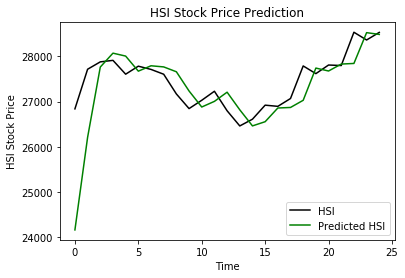

In [48]:
plt.plot(real_stock_price,color = 'black',label = 'HSI')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted HSI')
plt.title('HSI Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('HSI Stock Price')
plt.legend()
plt.show()